In [ ]:
#1 Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Step#1** establishes a connection between your Google Colab environment and your Google Drive so the notebook can access any datasets, scripts, or output files stored there. The code imports the drive module from google.colab and mounts your Drive at the path /content/drive, making your Drive behave like a local filesystem inside Colab. Once mounted, all subsequent steps in your workflow can reliably read from and write to your project directories, ensuring smooth data handling and reproducibility.

In [ ]:
#2 Set Project Paths

from pathlib import Path
import pandas as pd

PROJECT_ROOT = Path('/content/drive/MyDrive/projects/prostate_cancer')
DATA_DIR = PROJECT_ROOT / 'data'
OUTPUTS_DIR = PROJECT_ROOT / 'outputs'
OUTPUTS_DIR.mkdir(parents=True, exist_ok=True)

RAW_PATH = DATA_DIR / 'prostate_cancer_prediction_cleaned_imputed.csv'


**Step#2** establishes a clean, organized directory structure for your project by defining all key file paths in one place. Using pathlib, the code sets a PROJECT_ROOT folder inside your Google Drive project directory, then creates subdirectories for data and outputs. The OUTPUTS_DIR.mkdir(parents=True, exist_ok=True) line ensures the outputs folder exists before anything is saved there, supporting reproducibility and preventing file‑not‑found errors. Finally, the path to the raw dataset is defined as RAW_PATH, giving the rest of the workflow a consistent, centralized reference to the input data. This step is foundational for maintaining a tidy, scalable project layout.

In [ ]:
#3 Load Dataset

# Fix: The RAW_PATH variable was pointing to an incorrect location.
# Based on the available files in the kernel, the dataset
# 'prostate_cancer_prediction_cleaned_imputed.csv' is located directly
# in '/content/drive/MyDrive/'.
RAW_PATH = '/content/drive/MyDrive/prostate_cancer_prediction_cleaned_imputed.csv'

df = pd.read_csv(RAW_PATH)
df.head()

,Patient_ID,Age,Family_History,Race_African_Ancestry,PSA_Level,DRE_Result,Biopsy_Result,Difficulty_Urinating,Weak_Urine_Flow,Blood_in_Urine,...,Alcohol_Consumption,Hypertension,Diabetes,Cholesterol_Level,Screening_Age,Follow_Up_Required,Prostate_Volume,Genetic_Risk_Factors,Previous_Cancer_History,Early_Detection
0,1,78,No,Yes,5.07,Normal,Benign,No,No,No,...,Moderate,No,No,Normal,45,No,46.0,No,No,Yes
1,2,68,No,Yes,10.24,Normal,Benign,Yes,No,No,...,Low,No,No,High,65,No,78.2,No,No,Yes
2,3,54,No,No,13.79,Normal,Benign,No,No,No,...,Low,No,No,Normal,61,No,21.1,No,No,Yes
3,4,82,No,No,8.03,Abnormal,Benign,No,No,No,...,Low,No,No,Normal,47,Yes,79.9,No,Yes,Yes
4,5,47,Yes,No,1.89,Normal,Malignant,Yes,Yes,No,...,Moderate,Yes,No,Normal,72,No,32.0,No,No,Yes


**Step#3** loads the cleaned and imputed prostate cancer dataset into a pandas DataFrame so that all subsequent analysis can operate on a properly initialized data structure. The code defines the correct file path for the dataset, reads the CSV using pd.read_csv(), and then displays the first few rows with df.head(). This preview confirms that the file was loaded successfully and allows you to visually inspect the columns—such as demographic variables, clinical indicators, symptoms, and early detection outcomes—to ensure the dataset is structured as expected. This step is foundational because every downstream task depends on having the dataset correctly imported and verified.

In [ ]:
#4 Basic Dataset Overview

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (27945, 30)


,Patient_ID,Age,Family_History,Race_African_Ancestry,PSA_Level,DRE_Result,Biopsy_Result,Difficulty_Urinating,Weak_Urine_Flow,Blood_in_Urine,...,Alcohol_Consumption,Hypertension,Diabetes,Cholesterol_Level,Screening_Age,Follow_Up_Required,Prostate_Volume,Genetic_Risk_Factors,Previous_Cancer_History,Early_Detection
0,1,78,No,Yes,5.07,Normal,Benign,No,No,No,...,Moderate,No,No,Normal,45,No,46.0,No,No,Yes
1,2,68,No,Yes,10.24,Normal,Benign,Yes,No,No,...,Low,No,No,High,65,No,78.2,No,No,Yes
2,3,54,No,No,13.79,Normal,Benign,No,No,No,...,Low,No,No,Normal,61,No,21.1,No,No,Yes
3,4,82,No,No,8.03,Abnormal,Benign,No,No,No,...,Low,No,No,Normal,47,Yes,79.9,No,Yes,Yes
4,5,47,Yes,No,1.89,Normal,Malignant,Yes,Yes,No,...,Moderate,Yes,No,Normal,72,No,32.0,No,No,Yes


**Step#4** provides an initial, high‑level look at the dataset by displaying its overall shape and previewing the first few rows. The code prints the dataset’s dimensions—27,945 rows and 30 columns—giving you an immediate sense of its size and complexity. It then uses df.head() to show the first five records, allowing you to visually inspect how the data is structured, what the column names look like, and whether the values appear clean and consistent. This early snapshot is essential for orienting yourself to the dataset before diving into deeper exploratory analysis, helping you confirm that the data loaded correctly and that the variables match your expectations.

In [ ]:
#5 Inspect Column Types

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27945 entries, 0 to 27944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               27945 non-null  int64  
 1   Age                      27945 non-null  int64  
 2   Family_History           27945 non-null  object 
 3   Race_African_Ancestry    27945 non-null  object 
 4   PSA_Level                27945 non-null  float64
 5   DRE_Result               27945 non-null  object 
 6   Biopsy_Result            27945 non-null  object 
 7   Difficulty_Urinating     27945 non-null  object 
 8   Weak_Urine_Flow          27945 non-null  object 
 9   Blood_in_Urine           27945 non-null  object 
 10  Pelvic_Pain              27945 non-null  object 
 11  Back_Pain                27945 non-null  object 
 12  Erectile_Dysfunction     27945 non-null  object 
 13  Cancer_Stage             27945 non-null  object 
 14  Treatment_Recommended 

**Step#5** provides a structural overview of the dataset by displaying each column’s data type, the number of non‑null entries, and the overall memory footprint of the DataFrame. Using df.info(), this step reveals how many rows and columns the dataset contains, which variables are stored as integers, floats, or objects, and whether any columns contain missing values. This information is essential for planning downstream preprocessing—such as encoding categorical variables, converting data types, or handling potential inconsistencies—ensuring the dataset is properly formatted before deeper analysis or modeling.

In [ ]:
#6 Summary Statistics (Numeric Features)

df.describe()


,Patient_ID,Age,PSA_Level,BMI,Screening_Age,Prostate_Volume
count,27945.000000,27945.000000,27945.000000,27945.000000,27945.000000,27945.000000
mean,13973.000000,64.459939,7.751599,26.511605,56.902308,47.755770
std,8067.170973,14.404755,4.175012,4.888293,10.118064,18.704286
min,1.000000,40.000000,0.500000,18.000000,40.000000,15.000000
25%,6987.000000,52.000000,4.130000,22.300000,48.000000,31.700000
50%,13973.000000,64.000000,7.750000,26.500000,57.000000,47.700000
75%,20959.000000,77.000000,11.320000,30.700000,66.000000,63.900000
max,27945.000000,89.000000,15.000000,35.000000,74.000000,80.000000


**Step#6** generates a comprehensive statistical overview of all numeric variables in the dataset using df.describe(). The resulting table summarizes key metrics—such as count, mean, standard deviation, minimum and maximum values, and quartiles—for features like Patient_ID, Age, PSA_Level, BMI, Screening_Age, and Prostate_Volume. These statistics help you quickly understand the central tendencies, variability, and distributional patterns of each numeric feature. This step is essential for identifying potential outliers, unusual ranges, or skewed variables that may require transformation or special handling before modeling.

In [ ]:
#7 Summary Statistics (Categorical Features)

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique(), "\n")


Unique values in 'Family_History':
['No' 'Yes'] 

Unique values in 'Race_African_Ancestry':
['Yes' 'No'] 

Unique values in 'DRE_Result':
['Normal' 'Abnormal'] 

Unique values in 'Biopsy_Result':
['Benign' 'Malignant'] 

Unique values in 'Difficulty_Urinating':
['No' 'Yes'] 

Unique values in 'Weak_Urine_Flow':
['No' 'Yes'] 

Unique values in 'Blood_in_Urine':
['No' 'Yes'] 

Unique values in 'Pelvic_Pain':
['No' 'Yes'] 

Unique values in 'Back_Pain':
['No' 'Yes'] 

Unique values in 'Erectile_Dysfunction':
['No' 'Yes'] 

Unique values in 'Cancer_Stage':
['Localized' 'Metastatic' 'Advanced'] 

Unique values in 'Treatment_Recommended':
['Active Surveillance' 'Radiation' 'Immunotherapy' 'Chemotherapy'
 'Surgery' 'Hormone Therapy'] 

Unique values in 'Survival_5_Years':
['Yes' 'No'] 

Unique values in 'Exercise_Regularly':
['No' 'Yes'] 

Unique values in 'Healthy_Diet':
['Yes' 'No'] 

Unique values in 'Smoking_History':
['Yes' 'No'] 

Unique values in 'Alcohol_Consumption':
['Moderate' 'Low

**Step#7** examines the structure of all categorical variables in the dataset by identifying columns stored as text‑based (object) types and printing their unique values. This loop‑based inspection reveals every distinct category present in each feature—such as clinical findings, symptoms, lifestyle factors, and treatment recommendations—allowing you to quickly verify that categories are clean, consistent, and free of unexpected or misspelled entries. This step is essential for preparing categorical data for encoding, modeling, or visualization, and it provides a clear qualitative snapshot of the dataset’s non‑numeric features.

In [ ]:
#8 Missing Value Audit

print("Missing values per column:")
df.isnull().sum()


Missing values per column:


,0
Patient_ID,0
Age,0
Family_History,0
Race_African_Ancestry,0
PSA_Level,0
DRE_Result,0
Biopsy_Result,0
Difficulty_Urinating,0
Weak_Urine_Flow,0
Blood_in_Urine,0


**Step#8** performs a complete audit of missing data across the dataset by calculating how many null values appear in each column. The code prints a header message and then uses df.isnull().sum() to generate a column‑by‑column count of missing entries. The output shows that every feature—clinical, demographic, lifestyle, and outcome‑related—contains zero missing values, indicating a fully complete dataset. This step is crucial because it confirms that no imputation or data‑cleaning interventions are required before moving on to modeling or feature engineering, ensuring a smooth and reliable workflow.

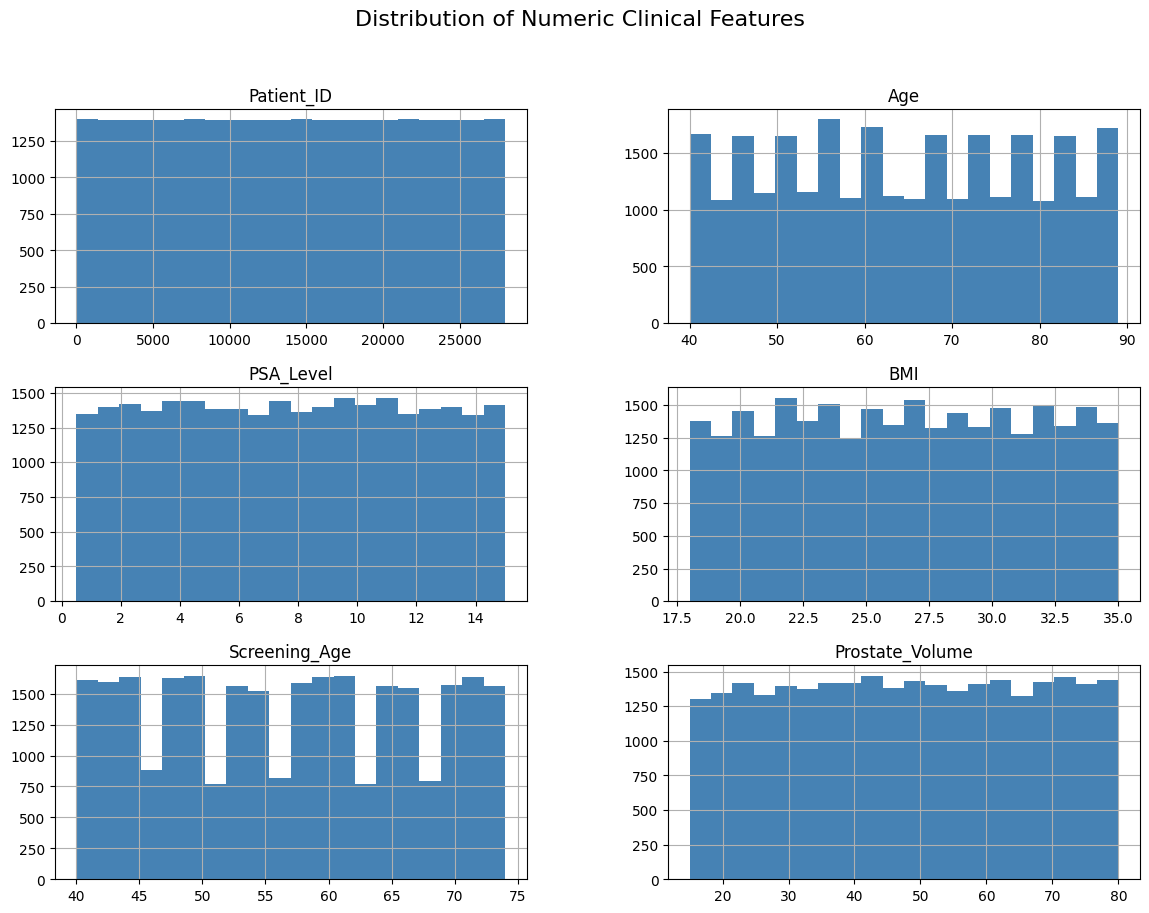

In [ ]:
#9 Distribution Plots for Numeric Clinical Features

import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols].hist(figsize=(14,10), bins=20, color='steelblue')
plt.suptitle("Distribution of Numeric Clinical Features", fontsize=16)
plt.show()


**Step#9** visualizes the distribution of all numeric clinical variables by generating a grid of histograms, allowing you to quickly assess how each feature is spread across the dataset. The code identifies numeric columns using select_dtypes and then plots histograms for each variable—such as age, PSA level, BMI, screening age, and prostate volume—using consistent binning and styling. The resulting figure provides an at‑a‑glance view of skewness, clustering, outliers, and overall variability, making this step a key part of exploratory data analysis before modeling or feature engineering.

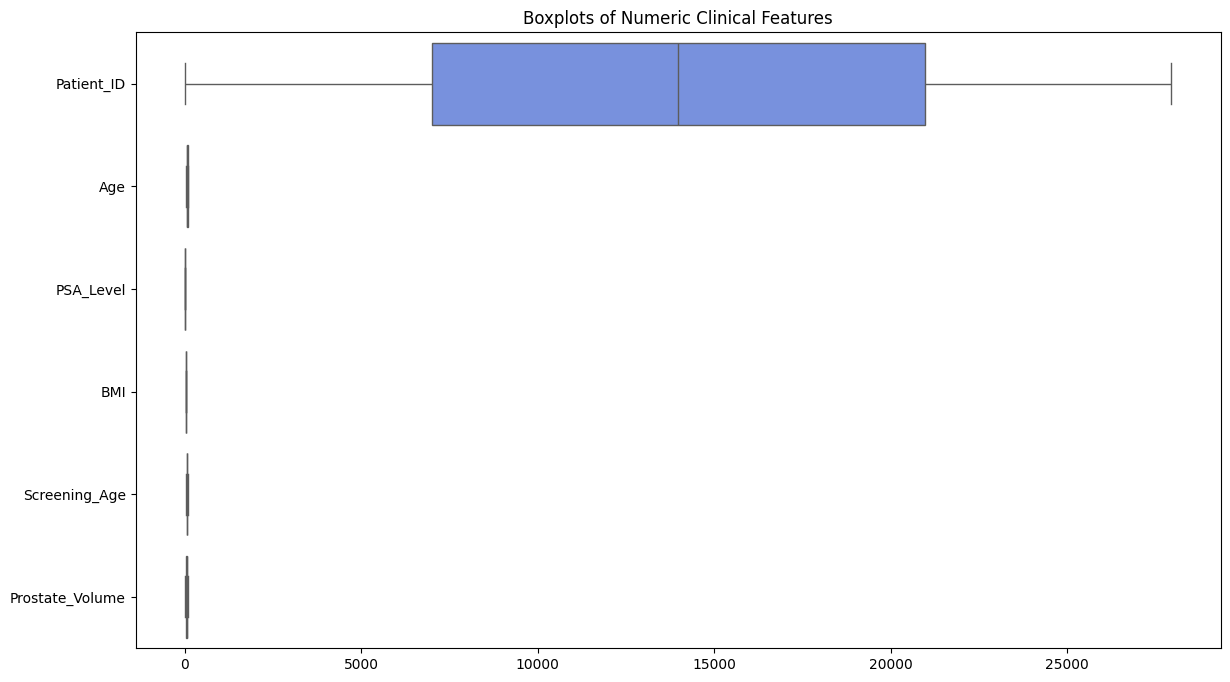

In [ ]:
#10 Boxplots for Numeric Features

plt.figure(figsize=(14,8))
sns.boxplot(data=df[numeric_cols], orient='h', palette='coolwarm')
plt.title("Boxplots of Numeric Clinical Features")
plt.show()


**Step#10** visualizes the spread, central tendency, and potential outliers of all numeric clinical features using horizontal boxplots. By passing the numeric columns into sns.boxplot and orienting the plot horizontally, the code produces a clean comparison of distributions for variables such as age, PSA level, BMI, screening age, and prostate volume. Boxplots are especially useful for spotting skewed data, extreme values, and differences in scale across features—insights that guide decisions about normalization, transformation, or outlier handling. This step deepens the exploratory analysis by complementing the earlier histograms with a more structure‑focused view of variability.

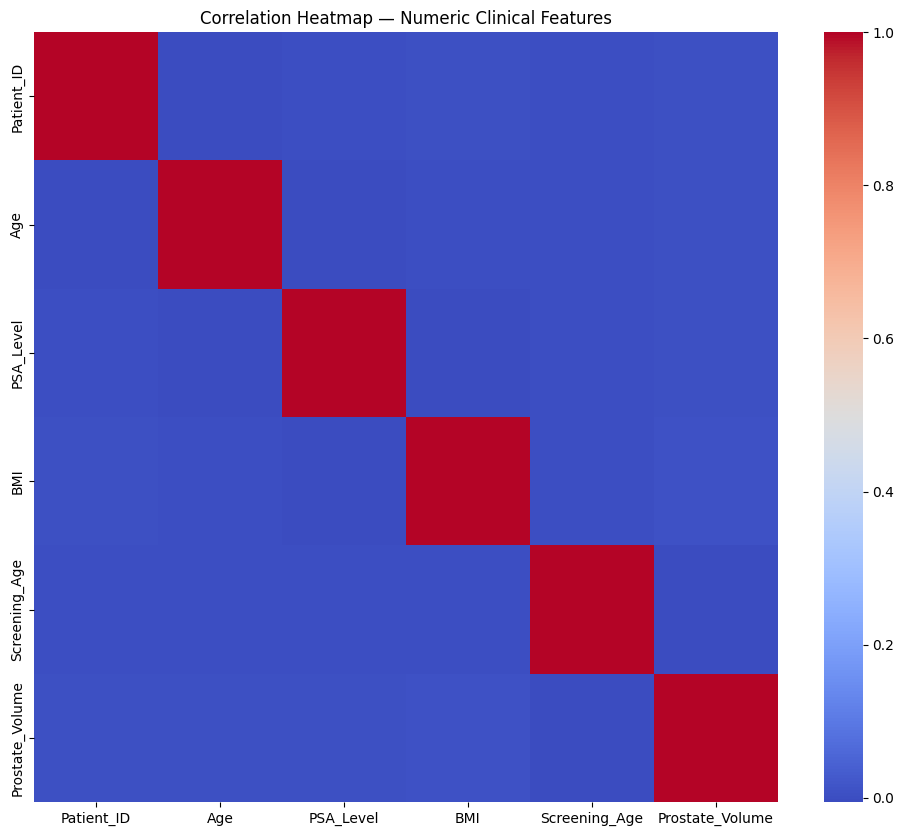

In [ ]:
#11 Correlation Heatmap

plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap — Numeric Clinical Features")
plt.show()


**Step#11** visualizes the relationships among all numeric clinical features by computing their correlation matrix and displaying it as a heatmap. The code uses df[numeric_cols].corr() to calculate pairwise correlations, then passes the matrix to sns.heatmap with a diverging color palette to highlight positive and negative relationships. The resulting plot makes it easy to spot strong associations, weak or nonexistent correlations, and potential redundancies among variables such as age, PSA level, BMI, screening age, and prostate volume. This step is essential for guiding feature selection, identifying multicollinearity, and shaping downstream modeling decisions.

In [ ]:
#12 Value Counts for Key Clinical Variables

key_vars = ["Gleason_Score_Group", "Biopsy_Result", "Tumor_Stage"]  # modify as needed

for col in key_vars:
    if col in df.columns:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())



Value counts for Biopsy_Result:
Biopsy_Result
Benign       19549
Malignant     8396
Name: count, dtype: int64


**Step#12** focuses on examining the distribution of specific high‑value clinical variables by computing their frequency counts. The code defines a list of key variables—such as Gleason_Score_Group, Biopsy_Result, and Tumor_Stage—and then checks whether each one exists in the dataset before printing its value counts. This targeted inspection is especially useful in clinical datasets where certain variables carry strong diagnostic or prognostic significance. In the example shown, the workflow prints the distribution of Biopsy_Result, revealing how many patients were classified as benign versus malignant. This step helps you quickly assess class balance, identify rare categories, and prepare for downstream modeling or stratified analyses.

In [ ]:
#13 Save Exploration Outputs (Optional)

EXPL_DIR = PROJECT_ROOT / 'exploration'
EXPL_DIR.mkdir(exist_ok=True)

df.describe().to_csv(EXPL_DIR / 'numeric_summary.csv')
print("Exploration summaries saved.")


Exploration summaries saved.


**Step#13** creates a dedicated folder for storing exploratory analysis outputs and then saves the numeric summary of the dataset as a CSV file. The code defines an exploration directory inside the project root and ensures it exists before writing any files. It then runs df.describe()—the numeric summary computed earlier—and exports it to numeric_summary.csv within that folder. This step helps preserve key exploratory insights, making them easy to reference later, share with collaborators, or include in reports. Although optional, it strengthens the workflow by promoting organization, reproducibility, and clean documentation of early analytical findings.